In [1]:
import evolocity as evo # uses Python 3.7
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [2]:
amino_acids = ["A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V"]

In [3]:
reference_protein = 'TTSAGESADPVTATVENYGGETQVQRRQHTDIAFILDRFVKVKPKEQVNVLDLMQIPAHTLVGALLRTATYYFSDLELAVKHEGDLTWVPNGAPETALDNTTNPTAYHKEPLTRLALPYTAPHRVLATVYNGSSKYGDTSTNNVRGDLQVLAQKAERTLPTSFNFGAIKATRVTELLYRMKRAETYCPRPLLAIQPSDARHKQRIVAPAKQ'

## Pre-computed Global Evolutionary Vector Field Example for Influenza A Nucleoprotein

In [4]:
adata = evo.datasets.nucleoprotein()
adata

AnnData object with n_obs × n_vars = 3304 × 1280
    obs: 'n_seq', 'seq', 'gene_id', 'embl_id', 'subtype', 'year', 'date', 'country', 'host', 'resist_adamantane', 'resist_oseltamivir', 'virulence', 'transmission', 'seqlen', 'homology', 'gong2013_step', 'louvain'
    uns: 'louvain', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

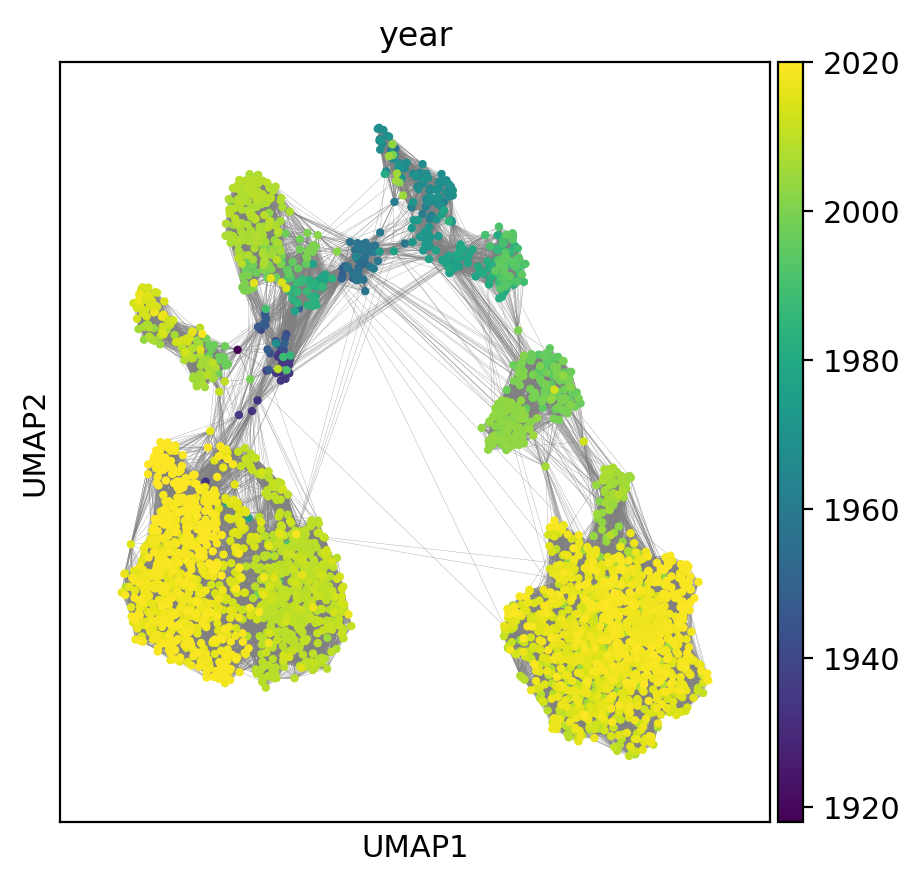

In [5]:
evo.set_figure_params(dpi_save=500, figsize=(5, 5))
sc.pl.umap(adata, color='year', edges=True,)

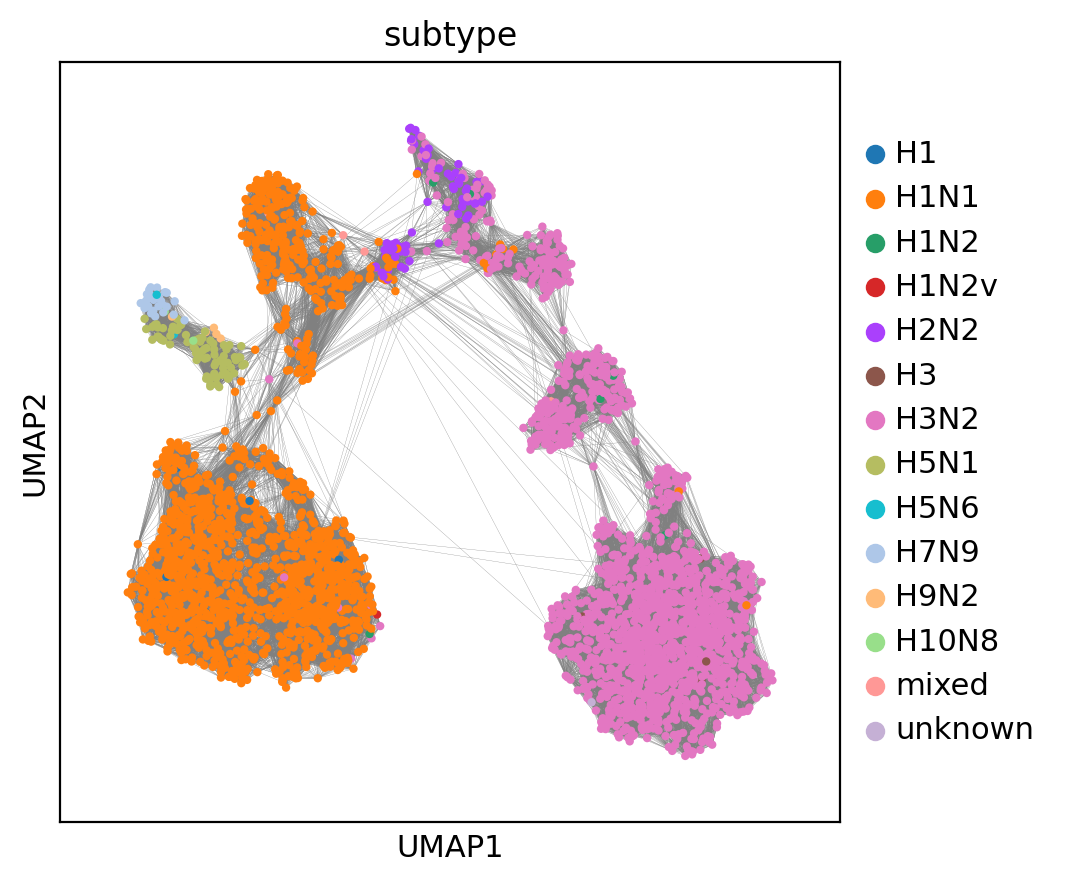

In [6]:
sc.pl.umap(adata, color='subtype', edges=True,)

## Fixing Evolocity Library

In [7]:
# # !python -m pip install evolocity
# # !pip install biopython
# import evolocity as evo
# import scanpy as sc

# # Note: evovelocity relies on an older version of biopython which assumes Bio.SubsMat instead of Bio.Align.substitution_matrices
# # Usage of substition matrices have been updated in evolocity\tools\velocity_graph.py lines at 13, 196 and 197

In [8]:
# # Load sequences and compute language model embeddings.
# adata = evo.pp.featurize_seqs(reference_protein)

In [9]:
# # Note: evovelocity relies on an older version of scanpy that uses write_knn_indices as an argument for compute_neighbours which is now depracated
# # Usage of this argument has been removed at evolocity\preprocessing\neighbors.py:163

# # Construct sequence similarity network.
# evo.pp.neighbors(adata)

In [10]:
# # Note: evovelocity relies on an older version of scipy which assumes a coo_matrix has a .A attribute which it no longer has 
# # Usage of this has been changed such that toarray() is used instead of A to convert to dense array
# # at evolocity\tools\velocity_graph.py:399, transition_matrix.py:99 and velocity_embedding.py:152

# # Run evolocity analysis.
# evo.tl.velocity_graph(adata)
# # Embed network and velocities in two-dimensions and plot.
# sc.tl.umap(adata)
# evo.tl.velocity_embedding(adata)

In [11]:
# # Note 1: evovelocity requires a minimum of 50 observations, whereas the fmd sequence only results in 20
# # Usage has been updated such that a minimum of 20 is used resulting in 1 neighbour at evolocity\plotting\velocity_embedding_grid.py:50
# # Note 2: evovelocity relies on an outdated version of matplotlib which makes use of the now deprecated gca()
# # Usage has been updated to replace with add_subplot() with argument projection at evolocity\plotting\utils.py:114
# # Note 3: evovolecity relies on an outdated version of pandas which makes use of is_categorical imported from the wrong folder as it has now been refactored
# # Usage has now been updated such that location is pandas.core.dtypes.common vs pandas.api.types and is_categorical_dtype vs is_categorical at evolocity\plotting\utils.py:50
# evo.pl.velocity_embedding_grid(adata)

In [12]:
# evo.pl.velocity_embedding_stream(adata)

# Applying Evolocity to Single-Residue Mutations for FMD Across 6 positions


In [13]:
# Creating FMD historical dataset
from Bio import SeqIO, Entrez
import evolocity as evo
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [14]:
# Entrez.email = "agubaubrey@protonmail.com"

# # Data Source: https://ars.els-cdn.com/content/image/1-s2.0-S101684782307200X-mmc1-molce-sup01.pdf
# # ["AY593786","AY593770","AY593785","AY593782","AY593783"]
# accession_no_list = ["KX784486","KX784485","JQ266911"]

# def fetchIsolateRecord(accession_no):
#     handle = Entrez.efetch(db="nucleotide", id=accession_no, rettype="gb", retmode="text")
#     record = SeqIO.read(handle, "genbank")
#     return record

# def buildSeqList(accession_no_list):
#     seq_list = []
#     for accession_no in accession_no_list:
#         record = fetchIsolateRecord(accession_no)
#         seq = record.seq
#         seq_list.append(seq)
#     return seq_list

# seq_list = buildSeqList(accession_no_list)
# seq_list

In [15]:
# seq_lengths = [len(seq) for seq in seq_list]
# print("Sequence lengths:", seq_lengths)


In [16]:
# Function Source: Kieran's script

# F: generates a list of sequences where every position in the protein sequence is mutated to every possible amino acid by default
# Note: this is only for single-residue mutation - need to update to deal with multiple mutations per sequence
def DMS(reference,start=0,end = None):
  if end == None:
    end = len(reference)
  seq_list = []
  amino_acids = ["A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V"]
  for i,ref_amino_acid in enumerate(reference):
      if i>=start and i<=end:
        for mutant_amino_acid in amino_acids:
            mutated_seq = reference[:i]+mutant_amino_acid+reference[i+1:]
            seq = SeqRecord(Seq(mutated_seq), id=ref_amino_acid+str(i+1)+mutant_amino_acid)
            seq_list.append(seq)
  return seq_list

seqs_of_mutations = DMS(reference_protein,138,143)
len(seqs_of_mutations)

120

In [17]:
def validateSeqs(seq_list):
    illegal_seqs = []
    for i,seq in enumerate(seq_list):
        illegal_chars = [char for char in seq if char not in amino_acids]
        if illegal_chars:
            illegal_seqs.append(i)
            print(f"Illegal characters found in sequence at index {i}: {illegal_chars}")
    if illegal_seqs:
        print(f"Indices of illegal sequences: {illegal_seqs}")
        return False
    else:
        return True
    
def extractSeqs(seqs_of_mutations):
    seq_list = [seq_rec.seq for seq_rec in seqs_of_mutations]
    isValid = validateSeqs(seq_list)
    if isValid:
        return seq_list
    else:
        print("Unable to process seqs")
        return None 

    
seq_list_new = extractSeqs(seqs_of_mutations)
len(seq_list_new)

120

In [18]:
# Load sequences and compute language model embeddings.
adata = evo.pp.featurize_seqs(seq_list_new) 

Embedding sequence batch 1 / 1


In [19]:
# Construct sequence similarity network.
evo.pp.neighbors(adata,n_neighbors=15) # defaul n_neighbors = 50 

computing neighbors
    finished (0:00:07) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


In [20]:
# Run evolocity analysis.
evo.tl.velocity_graph(adata)
# Embed network and velocities in two-dimensions and plot.
sc.pp.neighbors(adata) # default n_neighbors = 15
sc.tl.umap(adata)
evo.tl.velocity_embedding(adata)

100%|█████████████████████████████████████████| 115/115 [03:08<00:00,  1.64s/it]


100%|█████████████████████████████████████████| 115/115 [00:03<00:00, 35.46it/s]



         Falling back to preprocessing with `sc.pp.pca` and default params.
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


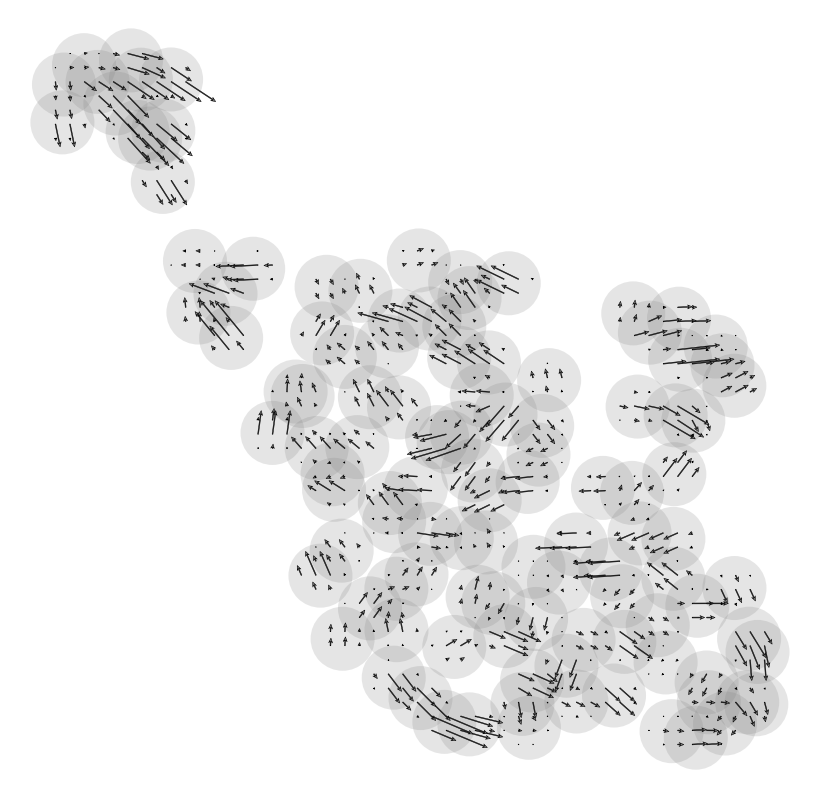

In [21]:
evo.pl.velocity_embedding_grid(adata)